# Linear Regression Practice

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub

In [ ]:
#set path to dataset link
path = kagglehub.dataset_download("sumedh1507/teen-phone-addiction")
print("Path to dataset",path)

Path to dataset /kaggle/input/teen-phone-addiction


In [ ]:
import shutil
import os
local_path="./phone-addiction-dataset"
os.makedirs(local_path, exist_ok=True) #create local path to access dataset from

try:
  for item in os.listdir(path): #iterates through contents of each directory in path
    s=os.path.join(path,item) #joins filepath of item to variable
    d=os.path.join(local_path,item)
    if os.path.isdir(s): #if s is a directory/subdirectory, copies all directory contents from original path item to local path item
      shutil.copytree(s,d)
    else:
      shutil.copy2(s,d) #otherwise, if s is a file, copies contents of file (and metadata) to destination
except FileExistsError:

  print(f"{local_path} already exists.")
print("Successful")

Successful


In [ ]:
with os.scandir(local_path) as entries:
  for entry in entries:
    csv_path=os.path.join(local_path,entry.name)
print(csv_path)

./phone-addiction-dataset/teen_phone_addiction_dataset.csv


In [ ]:
df=pd.read_csv(csv_path)

In [ ]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [ ]:
df.shape

(3000, 25)

In [ ]:
print(df.dtypes)
print(df.isnull().sum())

ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object
ID                        0
Name                      0
Age                       0
Gender                    0
Location                

In [ ]:
#get sample of data

df_10s = df[df['Addiction_Level']==10.0].sample(frac=0.13,random_state=42) #undersampling 10.0 values of addiction level column to handle data imbalance
df_others=df[df['Addiction_Level']!=10.0] #get dataframe of every row without 10.0

balanced_df=pd.concat([df_10s,df_others]) #combine datasets and return rows
print(len(balanced_df))
print(len(df))

1674
3000


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

equal_width_discretizer=KBinsDiscretizer(n_bins=40,encode='ordinal',strategy='uniform') #sort addiction level columns into bins for easier ml processing
balanced_df['Equal_Width_bin']=equal_width_discretizer.fit_transform(balanced_df[['Addiction_Level']])

equal_frequency_discretizer=KBinsDiscretizer(n_bins=40,encode='ordinal',strategy='quantile')
balanced_df['Equal_frequency_bin']=equal_frequency_discretizer.fit_transform(balanced_df[['Addiction_Level']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
balanced_df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Equal_Width_bin,Equal_frequency_bin
1542,1543,Rachel Clark,18,Male,North Susan,12th,5.8,6.4,69,3,...,8,5.0,1.5,1.2,Education,5,9.1,10.0,29.0,35.0
152,153,Steven Davis,16,Male,Sanchezport,8th,6.6,9.4,82,3,...,20,0.7,1.8,0.5,Gaming,5,3.5,10.0,29.0,35.0
1995,1996,Margaret West,15,Other,Schneiderhaven,7th,5.4,5.9,62,9,...,15,3.6,1.6,1.0,Browsing,6,5.8,10.0,29.0,35.0
2764,2765,Nicole Long,15,Female,South Jacob,11th,3.2,6.8,63,3,...,19,2.8,3.1,0.6,Other,1,4.9,10.0,29.0,35.0
1661,1662,Scott Kelly PhD,13,Male,New Elizabeth,11th,4.4,7.6,82,10,...,17,3.5,0.6,0.3,Gaming,10,4.2,10.0,29.0,35.0


In [ ]:
df2=balanced_df.drop(['ID','Name','Age','Gender','Location','School_Grade','Phone_Usage_Purpose','Addiction_Level'], axis=1) #drop all non-numerical values and unneeded values

In [ ]:
X=df2.drop(['Equal_Width_bin','Equal_frequency_bin'],axis=1) #drop bin columns
X

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
1542,5.8,6.4,69,3,0.8,8,7,7,1,0.0,22,8,5.0,1.5,1.2,5,9.1
152,6.6,9.4,82,3,1.1,7,4,7,0,0.3,83,20,0.7,1.8,0.5,5,3.5
1995,5.4,5.9,62,9,3.0,10,4,1,1,1.3,39,15,3.6,1.6,1.0,6,5.8
2764,3.2,6.8,63,3,0.0,4,9,1,1,0.6,126,19,2.8,3.1,0.6,1,4.9
1661,4.4,7.6,82,10,1.8,8,5,10,1,0.4,146,17,3.5,0.6,0.3,10,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,3.7,9.6,67,2,0.3,10,6,9,0,1.0,95,7,1.3,0.0,1.1,8,6.1
2995,3.9,6.4,53,4,0.9,7,10,2,1,0.3,80,15,2.7,1.8,1.0,8,9.4
2996,3.6,7.3,93,5,0.0,8,8,9,1,0.9,45,8,3.1,0.0,0.3,9,5.2
2997,3.2,6.5,98,1,0.0,4,3,9,0,0.2,51,13,2.4,0.2,2.4,9,5.9


In [ ]:
Y=balanced_df.Equal_frequency_bin #target value
Y

,Equal_frequency_bin
1542,35.0
152,35.0
1995,35.0
2764,35.0
1661,35.0
...,...
2994,0.0
2995,34.0
2996,3.0
2997,6.0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) #80/20 train test split

In [ ]:
X_train.shape,Y_train.shape

((1339, 17), (1339,))

In [ ]:
X_test.shape,Y_test.shape

((335, 17), (335,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train) #create and fit model

LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)
print("Coefficients:", model.coef_)
print("Intercept:",model.intercept_)

print("Mean Squared Error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared Score: %.2f" % r2_score(Y_test,Y_pred)) #calculate r-score

Coefficients: [ 4.67467002e+00 -2.42805267e+00 -5.62644781e-03 -3.47224770e-03
 -2.27399359e-01  1.02697411e-01  1.13625281e-02 -2.26244634e-02
 -6.21236687e-02 -1.56046400e-01  9.38102476e-02  9.47179735e-01
  4.76189814e+00  4.62699984e+00 -2.47116042e-01 -5.97225300e-02
 -8.97104715e-02]
Intercept: -17.262809926227206
Mean Squared Error: 17.80
Root Mean Squared Error (RMSE): 4.219482514832988
R-Squared Score: 0.85


In [ ]:
df2.head()

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Equal_Width_bin,Equal_frequency_bin
1542,5.8,6.4,69,3,0.8,8,7,7,1,0.0,22,8,5.0,1.5,1.2,5,9.1,29.0,35.0
152,6.6,9.4,82,3,1.1,7,4,7,0,0.3,83,20,0.7,1.8,0.5,5,3.5,29.0,35.0
1995,5.4,5.9,62,9,3.0,10,4,1,1,1.3,39,15,3.6,1.6,1.0,6,5.8,29.0,35.0
2764,3.2,6.8,63,3,0.0,4,9,1,1,0.6,126,19,2.8,3.1,0.6,1,4.9,29.0,35.0
1661,4.4,7.6,82,10,1.8,8,5,10,1,0.4,146,17,3.5,0.6,0.3,10,4.2,29.0,35.0


In [ ]:
import seaborn as sns

<Axes: xlabel='Equal_frequency_bin', ylabel='Sleep_Hours'>

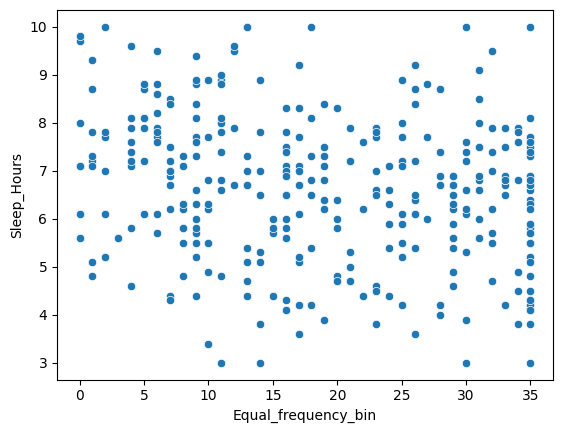

In [ ]:
sns.scatterplot(x=Y_test,y=df2.Sleep_Hours) #reveal graph